In [134]:
%matplotlib notebook

# Project breakdown

In [8]:
yearly_new = run_mariadb(
"""
select
    extract(year from month) as year,
    avg(new_active_editors)
from (
    select 
    month, 
    sum(extract(year_month from reg) = extract(year_month from month)) as new_active_editors
    from (
    select month, user_name, sum(content_edits) as content_edits, 
    min(user_registration) as reg, max(bot_flag) as bot_flag
    from staging.editor_month
    where local_user_id != 0
    group by month, user_name
    ) global_edits
    where
    month >= "2013-01-01" and
    content_edits >= 5 and 
    bot_flag = 0 and
    convert(user_name using utf8) not regexp "bot\\b" and
    convert(user_name using utf8) not regexp "[ _]bot[ _]"
    group by month
) monthly_new
group by extract(year from month)
"""
)

/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908C'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908D'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D94'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D96'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D92'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0A08D'")
  self._do_get_result()


In [9]:
yearly_new

,year,avg(new_active_editors)
0,2013,18423.4167
1,2014,19750.6667
2,2015,19495.2500
3,2016,18182.6667
4,2017,17198.5000


In [24]:
yearly_new_by_proj = run_mariadb(
"""
select
    extract(year from month) as year,
    wiki,
    avg(new_actives) as new_actives
from (
    select 
    month,
    wiki,
    sum(extract(year_month from user_registration) = extract(year_month from month)) as new_actives
    from staging.editor_month
    where
    month >= "2013-01-01" and
    content_edits >= 5 and
    local_user_id != 0 and
    bot_flag = 0 and
    convert(user_name using utf8) not regexp "bot\\b" and
    convert(user_name using utf8) not regexp "[ _]bot[ _]"
    group by month, wiki
) monthly_new
group by extract(year from month), wiki
"""
)

/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908C'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908D'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D94'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D96'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D92'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0A08D'")
  self._do_get_result()


In [46]:
wikis = yearly_new_by_proj.wiki.unique()

In [48]:
years = np.arange(2013, 2018)

In [58]:
wiki_year = yearly_new_by_proj.set_index(["wiki", "year"])
wiki_year = wiki_year.reindex(pd.MultiIndex.from_product([wikis, years], names=['wiki', 'year'])).fillna(0)

In [108]:
wiki_year.groupby(level = "wiki").agg(lambda x: x.iloc[4] - x.iloc[1]).reset_index().sort_values(by = "new_actives", ascending = False)

,wiki,new_actives
683,wikidatawiki,353.0000
93,commonswiki,142.3334
601,tawiki,76.3333
176,fawiki,71.5833
60,bnwiki,20.9167
166,etwiki,17.8334
412,mrwiki,17.0834
701,zh_yuewiki,14.4167
151,enwiktionary,13.6666
246,hiwiki,13.5000


# Seasonal analysis

In [ ]:
monthly_new = run_mariadb(
"""
select 
month, 
sum(extract(year_month from reg) = extract(year_month from month)) as new_active_editors
from (
select month, user_name, sum(content_edits) as content_edits, 
min(user_registration) as reg, max(bot_flag) as bot_flag
from staging.editor_month
where local_user_id != 0
group by month, user_name
) global_edits
where
content_edits >= 5 and 
bot_flag = 0 and
convert(user_name using utf8) not regexp "bot\\b" and
convert(user_name using utf8) not regexp "[ _]bot[ _]"
group by month
"""
)

/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908C'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0A59D'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0AA9A'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0A094'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F0908D'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/python3.4/site-packages/pymysql/cursors.py:323: Warning: (1300, "Invalid utf8 character string: 'F09D94'")
  self._do_get_result()
/home/neilpquinn-wmf/venv/lib/pyth

In [119]:
monthly_new = monthly_new.set_index(pd.DatetimeIndex(monthly_new["month"])).drop("month", axis = 1)

In [121]:
monthly_new.head()

,new_active_editors
month,
1970-01-01,0.0
2001-01-01,4.0
2001-02-01,3.0
2001-03-01,9.0
2001-04-01,1.0


In [127]:
monthly_new = monthly_new.ix[1:]

<IPython.core.display.Javascript object>


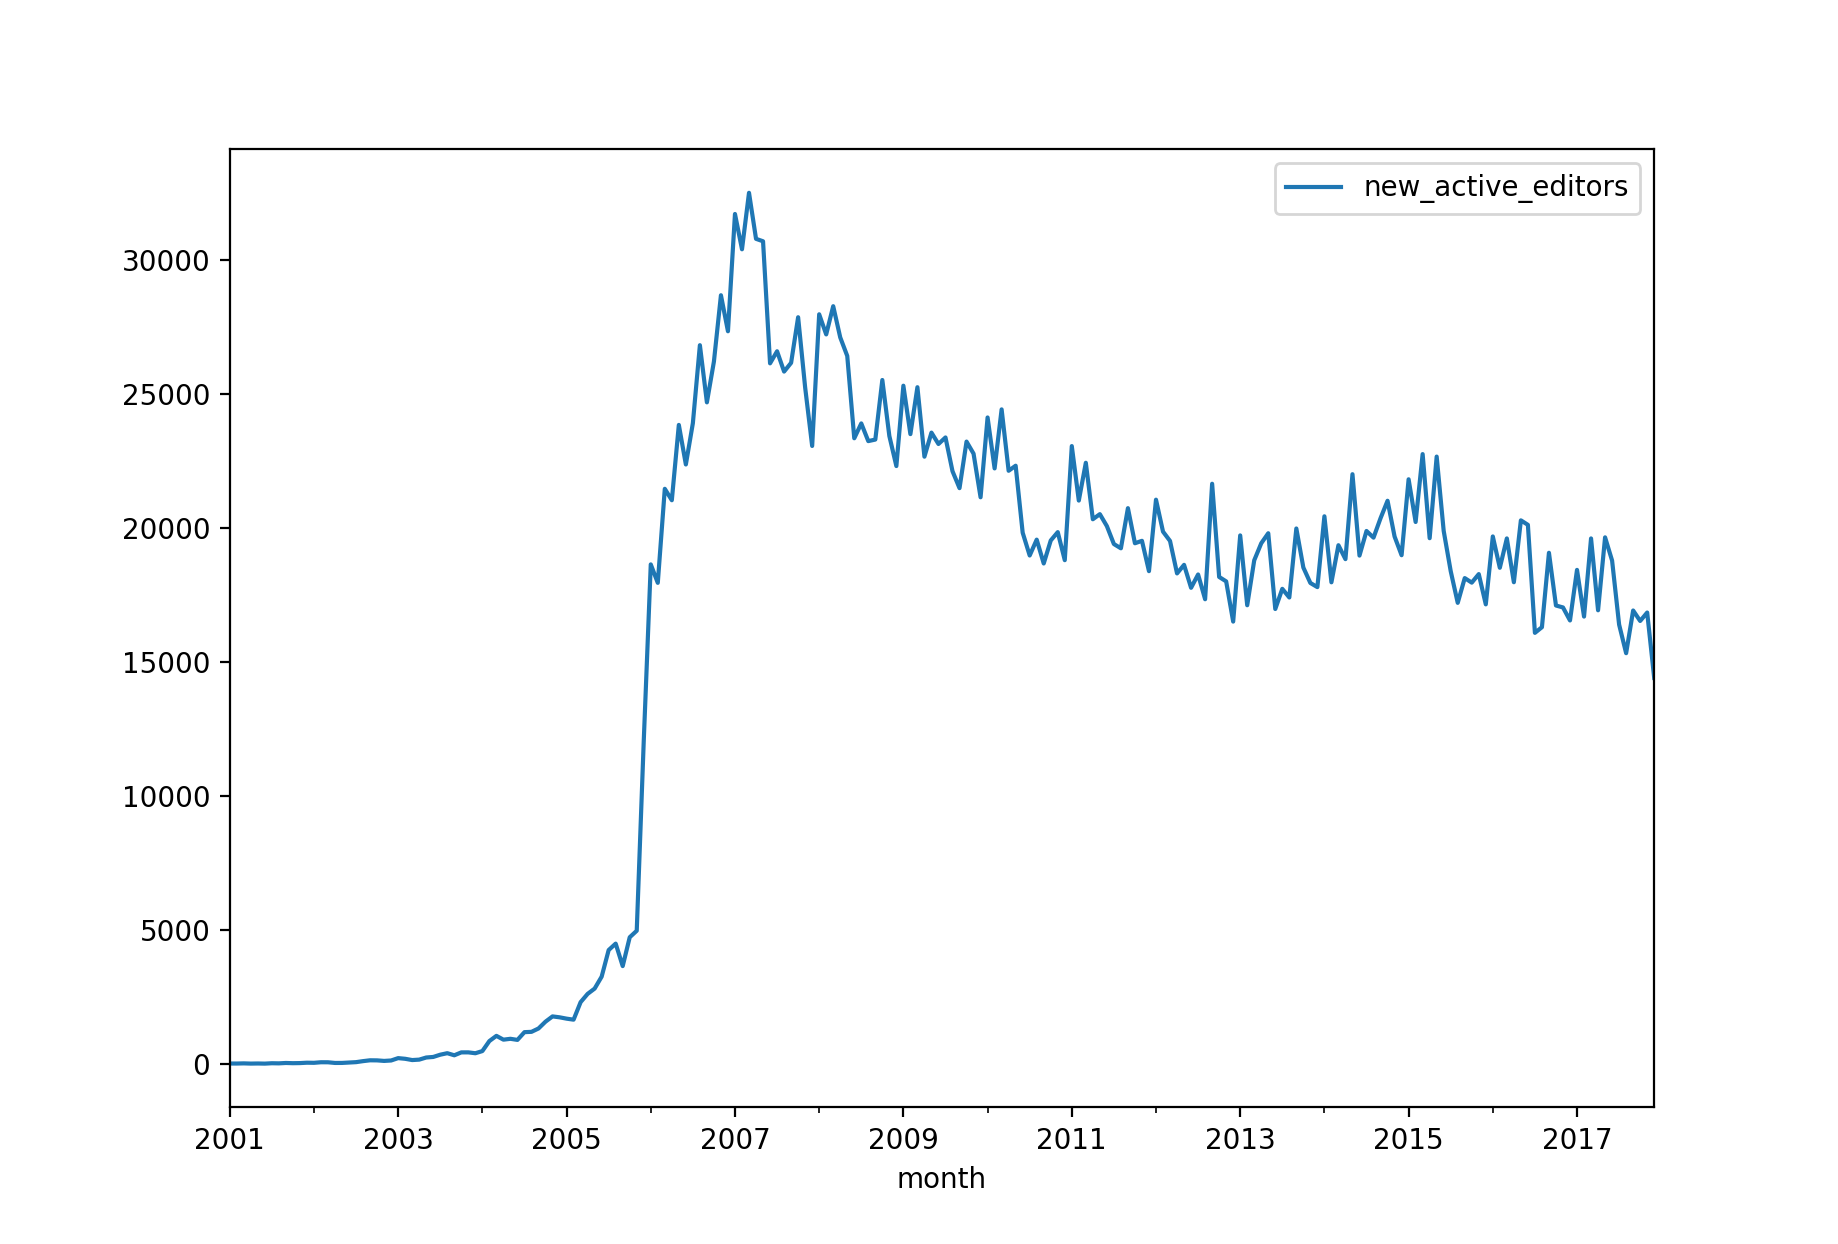

In [135]:
monthly_new.plot()
plt.pyplot.show()

<IPython.core.display.Javascript object>


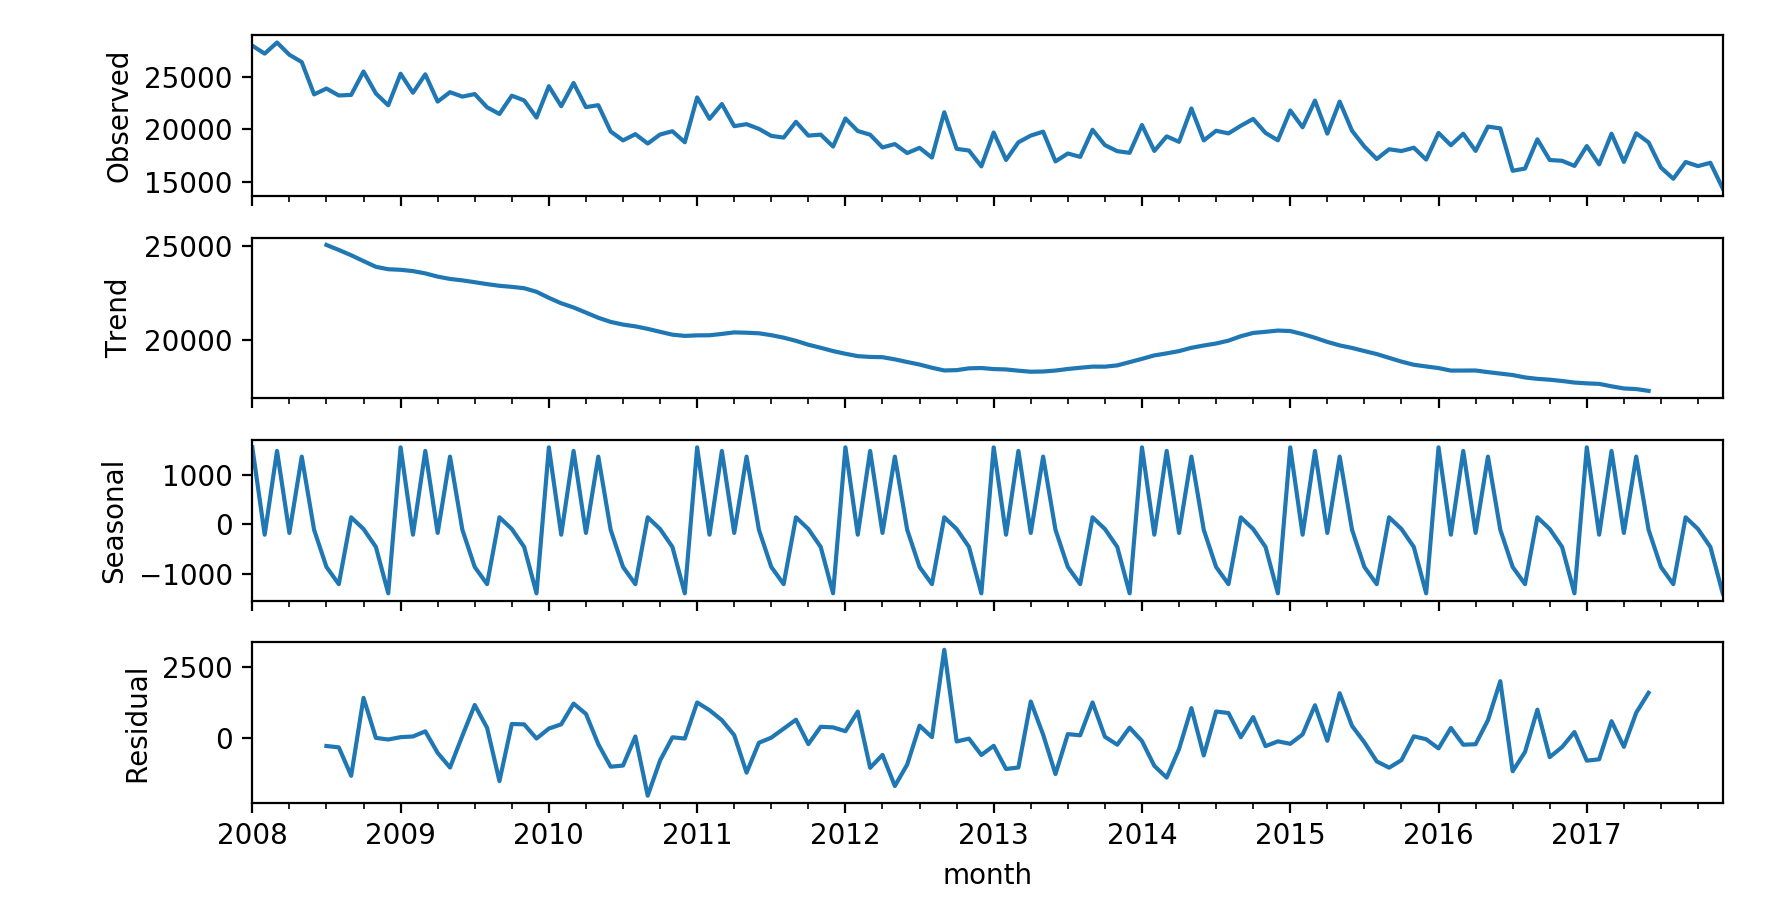

In [137]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(monthly_new.loc["2008-01-01":], model='additive')
result.plot()
plt.pyplot.show()

# Additional things to investigate:
* Correlation between size of new editor cohort and its retention?
* Correlations between registrations and new editors?